In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Preparation

Measure the actual luminance of the 4 typical color with different assinged luminance parameters

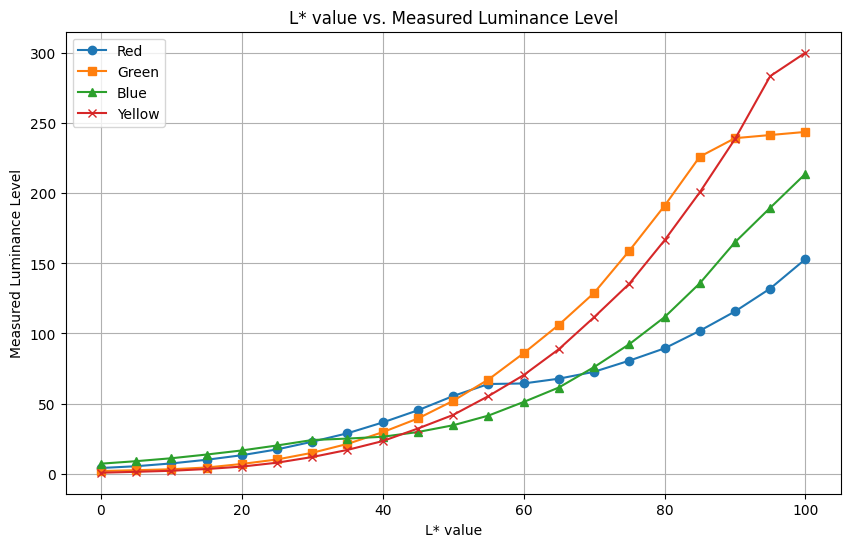

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sample data based on the image provided
data = {
    # R
    'R1': [91, 102, 115, 130, 145, 161, 177, 193, 209, 226, 243, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    'G1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 48, 68, 85, 102, 118, 133, 148, 163, 179],
    'B1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 23, 37, 50, 63, 76, 89, 102, 115, 128],
    'L1*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a1*': [80] * 21,
    'b1*': [67] * 21,
    'MeasuredL1': [4.02, 5.3, 7.29, 9.9, 13.15, 17.3, 22.78, 28.8, 36.52, 45.22, 55.38, 63.95, 64.34, 67.75, 72.67,
                   80.61, 89.38, 101.9, 115.71, 132.07, 153.06],

    # G
    'R2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 65, 89],
    'G2': [36, 42, 47, 55, 66, 78, 91, 104, 118, 132, 146, 160, 174, 188, 202, 217, 232, 246, 255, 255, 255],
    'B2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 47, 66],
    'L2*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a2*': [-86.18] * 21,
    'b2*': [83.18] * 21,
    'MeasuredL2': [1.86, 2.46, 3.14, 4.37, 6.9, 10.12, 14.88, 21.21, 29.58, 39.37, 51.97, 67.14, 85.89, 106.16, 128.92,
                   159, 191.08, 226.12, 239.34, 241.59, 243.81],

    # B
    'R3': [0, 0, 0, 0, 0, 0, 0, 37, 68, 92, 112, 131, 149, 166, 183, 200, 217, 233, 250, 255, 255],
    'G3': [0, 0, 0, 0, 0, 0, 0, 15, 34, 50, 64, 78, 92, 106, 120, 134, 147, 161, 176, 190, 204],
    'B3': [161, 175, 189, 204, 218, 233, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    'L3*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a3*': [79.2] * 21,
    'b3*': [-107.86] * 21,
    'MeasuredL3': [7.12, 8.89, 10.98, 13.63, 16.55, 20.1, 24, 25.02, 26.31, 29.71, 34.52, 41.4, 51.13, 61.46, 76.01,
                   92.36, 111.64, 135.78, 165.07, 189.69, 213.92],

    # Yellow
    'R4': [33, 40, 45, 47, 51, 57, 66, 76, 88, 100, 113, 127, 142, 156, 171, 186, 202, 217, 232, 248, 255],
    'G4': [7, 21, 31, 42, 53, 65, 77, 89, 101, 114, 126, 139, 152, 165, 179, 192, 206, 220, 234, 248, 255],
    'B4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27],
    'L4*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a4*': [-21.56] * 21,
    'b4*': [94.48] * 21,
    'MeasuredL4': [0.66, 1.32, 2.05, 3.3, 5.03, 7.81, 11.86, 16.95, 23.24, 32.2, 41.9, 55.3, 70.28, 88.81, 111.59,
                   135.5, 166.46, 200.69, 238.73, 283.59, 300.31],

    # Magenda
    'R5': [73, 86, 101, 116, 131, 146, 161, 176, 192, 207, 222, 238, 253, 255, 255, 255, 255, 255, 255, 255, 255],
    'G5': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 67, 86, 104, 121, 137, 153, 169],
    'B5': [89, 102, 114, 128, 141, 154, 168, 182, 196, 210, 224, 239, 254, 255, 255, 255, 255, 255, 255, 255, 255],
    'L5*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a5*': [98.25] * 21,
    'b5*': [-60.84] * 21,
    'MeasuredL5': [3.74, 5.46, 7.74, 10.9, 14.68, 19.32, 24.78, 31.28, 39.72, 48.77, 58.75, 71.05, 84.36, 85.31, 87.66,
                   93.06, 100.98, 111.14, 123.37, 138.22, 155.22],

    # Cyan
    'R6': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 75],
    'G6': [28, 35, 42, 51, 62, 75, 87, 100, 113, 126, 139, 152, 166, 180, 194, 208, 222, 237, 251, 255, 255],
    'B6': [25, 35, 45, 56, 68, 79, 91, 103, 116, 128, 141, 154, 168, 181, 195, 209, 223, 237, 251, 255, 255],
    'L6*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a6*': [-48.08] * 21,
    'b6*': [-14.14] * 21,
    'MeasuredL6': [1.27, 1.88, 2.72, 4.2, 6.58, 10.16, 14.76, 20.79, 28.7, 37.96, 49.74, 63.05, 79.84, 99.39, 122.02,
                   148.78, 178.34, 213.48, 251.72, 258.04, 259.47],

    # Yellow-b*
    'R7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'G7': [33, 41, 49, 59, 69, 80, 91, 103, 115, 127, 140, 152, 165, 179, 192, 206, 220, 234, 248, 255, 255],
    'B7': [139, 153, 167, 181, 195, 209, 223, 238, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    'L7*': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'a7*': [-21.56] * 21,
    'b7*': [-94.48] * 21,
    'MeasuredL7': [5.63, 7.67, 10.27, 13.67, 18.05, 23.35, 30.25, 38.62, 48.78, 56.53, 67.96, 79.14, 93.98, 111.83,
                   132.13, 154.7, 182.52, 212.09, 246.11, 258.37, 258.3]
}

df = pd.DataFrame(data)

# Define the interpolation functions
f1 = interp1d(df['MeasuredL1'], df['L1*'], fill_value="extrapolate")
f2 = interp1d(df['MeasuredL2'], df['L2*'], fill_value="extrapolate")
f3 = interp1d(df['MeasuredL3'], df['L3*'], fill_value="extrapolate")
f4 = interp1d(df['MeasuredL4'], df['L4*'], fill_value="extrapolate")
f5 = interp1d(df['MeasuredL5'], df['L5*'], fill_value="extrapolate")
f6 = interp1d(df['MeasuredL6'], df['L6*'], fill_value="extrapolate")
f7 = interp1d(df['MeasuredL7'], df['L7*'], fill_value="extrapolate")

def get_l_values(measured_luminance):
    L1_star = f1(measured_luminance)
    L2_star = f2(measured_luminance)
    L3_star = f3(measured_luminance)
    L4_star = f4(measured_luminance)
    L5_star = f5(measured_luminance)
    L6_star = f6(measured_luminance)
    L7_star = f7(measured_luminance)
    return L1_star, L2_star, L3_star, L4_star, L5_star, L6_star, L7_star

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(df['L1*'], df['MeasuredL1'], label='Red', marker='o')
plt.plot(df['L2*'], df['MeasuredL2'], label='Green', marker='s')
plt.plot(df['L3*'], df['MeasuredL3'], label='Blue', marker='^')
plt.plot(df['L4*'], df['MeasuredL4'], label='Yellow', marker='x')
# plt.plot(df['L5*'], df['MeasuredL5'], label='Magenta', marker='d')
# plt.plot(df['L6*'], df['MeasuredL6'], label='Cyan', marker='p')
# plt.plot(df['L7*'], df['MeasuredL7'], label='Yellow-b*', marker='v')

plt.xlabel('L* value')
plt.ylabel('Measured Luminance Level')
plt.title('L* value vs. Measured Luminance Level')
plt.legend()
plt.grid(True)

'''
# Example usage
measured_luminance = 30
L1_star, L2_star, L3_star, L4_star, L5_star, L6_star, L7_star = get_l_values(measured_luminance)

print(f"For measured luminance level {measured_luminance}:")
print(f"L* value for R1: {L1_star}")
print(f"L* value for G2: {L2_star}")
print(f"L* value for B3: {L3_star}")
print(f"L* value for Y4: {L4_star}")
print(f"L* value for M5: {L5_star}")
print(f"L* value for C6: {L6_star}")
print(f"L* value for Y7: {L7_star}")
'''
plt.show()


## Hypothesis 1 H1: Color along could induce the illusion

In [3]:
# Load the dataset
file_path = '4colorcombination/4colorsresult.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Remove empty rows
df = df.dropna(how='all')

# Display the first few rows of the DataFrame
df.head()

,L value (g1),Actual Luminance (g1),RGB (g1),Lab (g1),L value (g2),Actual Luminance (g2),RGB (g2),Lab (g2),Final Angular Velocity
0,98.077553,204.603821,"(255, 199, 255)","(98.0775529152827, 79.2, -107.86)",81.929769,204.603821,"(0, 237, 0)","(81.92976903930649, -86.18, 83.18)",0.1
1,76.555256,98.357069,"(205, 138, 255)","(76.55525640178543, 79.2, -107.86)",63.075251,98.357069,"(0, 182, 0)","(63.07525127905392, -86.18, 83.18)",0.1
2,43.479856,42.574949,"(221, 0, 0)","(43.47985588422074, 80, 67)",46.271805,42.574949,"(0, 135, 0)","(46.27180525339051, -86.18, 83.18)",-0.2
3,82.019736,205.234308,"(0, 238, 0)","(82.01973580429681, -86.18, 83.18)",98.207658,205.234308,"(255, 199, 255)","(98.20765755602808, 79.2, -107.86)",-0.1
4,74.721640,134.168884,"(186, 191, 0)","(74.72164040078009, -21.56, 94.48)",84.666298,134.168884,"(232, 161, 255)","(84.66629751378012, 79.2, -107.86)",-0.1


### Plotting the Actual luminance value against the Final Angular velocity

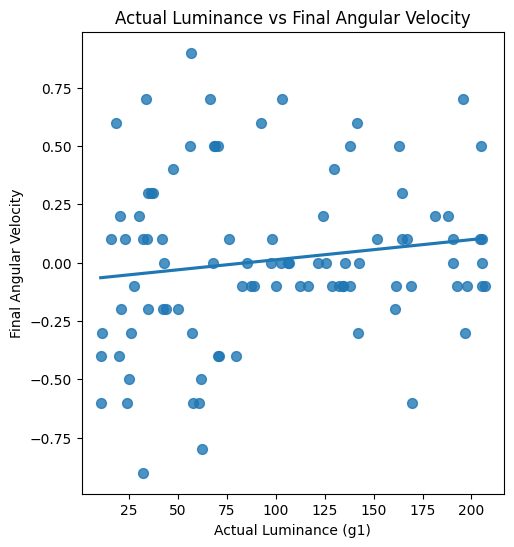

In [20]:
# Scatter plot for Actual Luminance (g1) vs Final Angular Velocity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Actual Luminance (g1)', y='Final Angular Velocity', data=df, ci=None, scatter_kws={'s': 50})
plt.title('Actual Luminance vs Final Angular Velocity')
plt.xlabel('Actual Luminance (g1)')
plt.ylabel('Final Angular Velocity')

plt.show()

### Contrast means Euclidean distance between two RGB figure

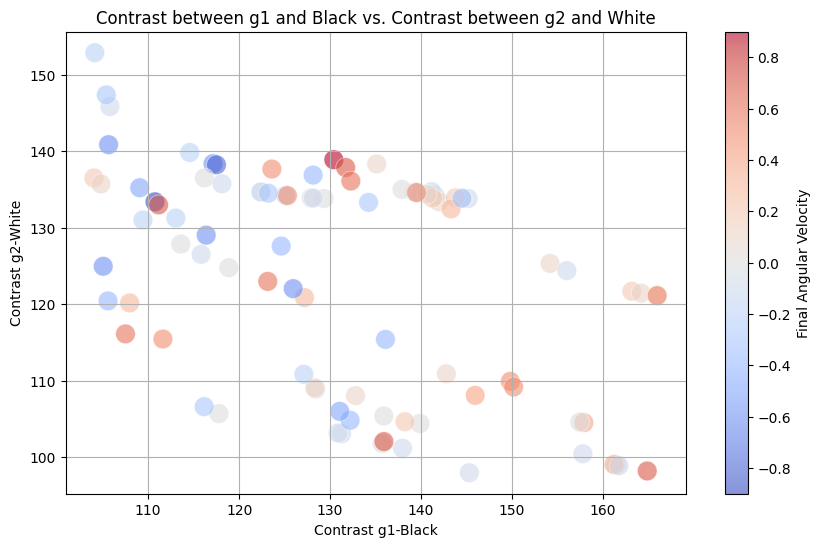

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Split the Lab (g1) and Lab (g2) values into separate columns for L, a, b
df[['L1', 'a1', 'b1']] = df['Lab (g1)'].str.extract(r'\(([^,]+), ([^,]+), ([^,]+)\)').astype(float)
df[['L2', 'a2', 'b2']] = df['Lab (g2)'].str.extract(r'\(([^,]+), ([^,]+), ([^,]+)\)').astype(float)

# Define Lab values for black and white
black_lab = np.array([0, 0, 0])
white_lab = np.array([100, 0, 0])

# Compute the color contrast
df['Contrast g1-Black'] = np.sqrt((df['L1'] - black_lab[0])**2 + (df['a1'] - black_lab[1])**2 + (df['b1'] - black_lab[2])**2)
df['Contrast g2-White'] = np.sqrt((df['L2'] - white_lab[0])**2 + (df['a2'] - white_lab[1])**2 + (df['b2'] - white_lab[2])**2)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Contrast g1-Black'], df['Contrast g2-White'],
s = 200,
c=df['Final Angular Velocity'],
cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Final Angular Velocity')

# Adding labels and title
plt.xlabel('Contrast g1-Black')
plt.ylabel('Contrast g2-White')
plt.title('Contrast between g1 and Black vs. Contrast between g2 and White')

# Adding grid for better visualization
plt.grid(True)

# Display the plot
plt.show()


### Box plot of different color pairs with thresholds

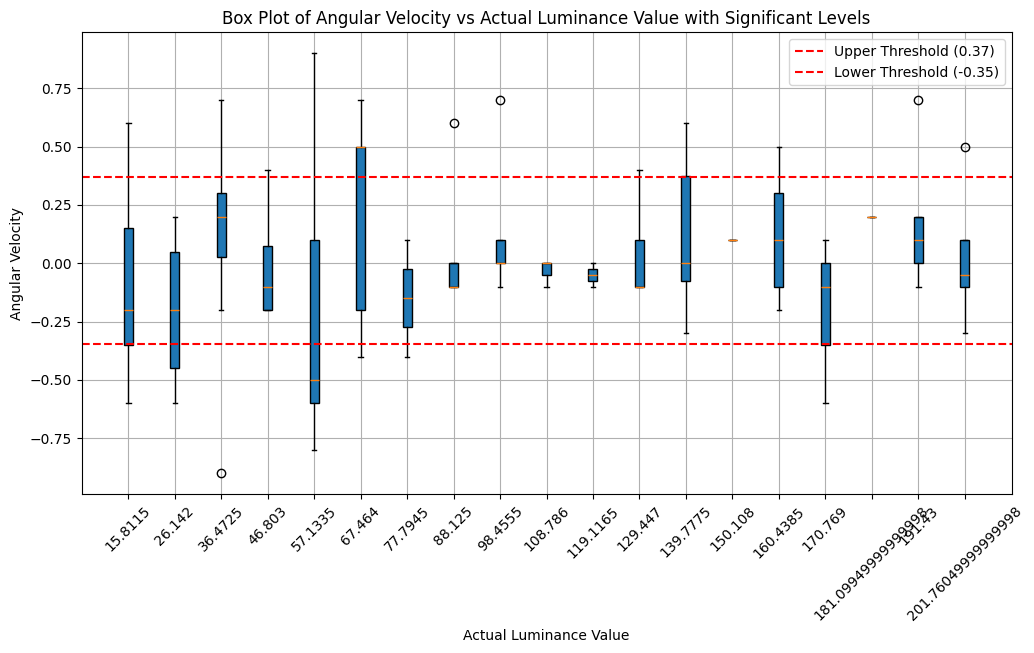

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define bins for actual luminance values
bins = np.linspace(df['Actual Luminance (g1)'].min(), df['Actual Luminance (g1)'].max(), 20)
df['Luminance Bin'] = pd.cut(df['Actual Luminance (g1)'], bins)

# Group the data by the luminance bin
grouped = df.groupby('Luminance Bin', observed=False)['Final Angular Velocity']

# Prepare data for box plot
data_for_box_plot = [group for _, group in grouped]

# Get the positions for the box plots (use the midpoint of each bin for the x-axis)
positions = [bin.mid for bin in grouped.groups.keys()]

# Calculate mean and standard deviation of the angular velocities
mean_velocity = df['Final Angular Velocity'].mean()
std_velocity = df['Final Angular Velocity'].std()

# Define the threshold for non-significant data (within one standard deviation)
threshold_upper = mean_velocity + std_velocity
threshold_lower = mean_velocity - std_velocity

# Plot the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_for_box_plot, positions=positions, widths=2, patch_artist=True)

# Add horizontal lines for the threshold
plt.axhline(y=threshold_upper, color='r', linestyle='--', label=f'Upper Threshold ({threshold_upper:.2f})')
plt.axhline(y=threshold_lower, color='r', linestyle='--', label=f'Lower Threshold ({threshold_lower:.2f})')

# Customize the plot
plt.xlabel('Actual Luminance Value')
plt.ylabel('Angular Velocity')
plt.title('Box Plot of Angular Velocity vs Actual Luminance Value with Significant Levels')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [26]:
# Count the total number of data points and the number outside the threshold
total_data_points = df['Final Angular Velocity'].count()
outside_threshold_count = sum((group < threshold_lower).sum() + (group > threshold_upper).sum() for group in data_for_box_plot)
outside_threshold_percentage = (outside_threshold_count / total_data_points) * 100
print(f'Total data points: {total_data_points}')
print(f'Data points outside the threshold: {outside_threshold_count}')
print(f'Percentage of data points outside the threshold: {outside_threshold_percentage:.2f}%')


Total data points: 95
Data points outside the threshold: 30
Percentage of data points outside the threshold: 31.58%


It basically shows that the H1 is rejected

In [7]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML



# Filter the data to find entries outside the thresholds
outside_threshold = df[(df['Final Angular Velocity'] > threshold_upper) | (df['Final Angular Velocity'] < threshold_lower)]

# Extract relevant color information for g1 and g2
outside_threshold_colors = outside_threshold[['Actual Luminance (g1)', 'RGB (g1)', 'Lab (g1)', 'Actual Luminance (g2)', 'RGB (g2)', 'Lab (g2)', 'Final Angular Velocity']]

# Rename columns for better readability
outside_threshold_colors.columns = [
    'Luminance (g1)', 'RGB (g1)', 'Lab (g1)', 
    'Luminance (g2)', 'RGB (g2)', 'Lab (g2)', 
    'Final Angular Velocity'
]

# Generate HTML table with custom styling
html_table = outside_threshold_colors.to_html(index=False, table_id="data_table", classes="table table-striped table-bordered")

# Additional CSS styling
html_style = """
<style>
#data_table thead th {
    background-color: #f2f2f2;
    font-weight: bold;
}
#data_table tbody tr:nth-child(even) {
    background-color: #f9f9f9;
}
#data_table tbody tr:nth-child(odd) {
    background-color: white;
}
</style>
"""

# Display the styled table with caption
html_output = f"""
{html_style}
<h2>Data Points Outside Threshold</h2>
{html_table}
"""
display(HTML(html_output))


Luminance (g1),RGB (g1),Lab (g1),Luminance (g2),RGB (g2),Lab (g2),Final Angular Velocity
60.880299,"(254, 0, 0)","(53.20904254597861, 80, 67)",60.880299,"(165, 105, 255)","(64.71940896602486, 79.2, -107.86)",-0.6
62.283844,"(255, 10, 3)","(54.027913701051006, 80, 67)",62.283844,"(167, 107, 255)","(65.28310793250908, 79.2, -107.86)",-0.8
129.975473,"(229, 158, 255)","(83.79773666429354, 79.2, -107.86)",129.975473,"(255, 162, 113)","(94.35986326870696, 80, 67)",0.4
47.718307,"(142, 87, 255)","(58.2468177442696, 79.2, -107.86)",47.718307,"(119, 132, 0)","(52.171010197891285, -21.56, 94.48)",0.4
70.828211,"(255, 79, 45)","(68.12826318083081, 80, 67)",70.828211,"(0, 162, 0)","(55.98352292531667, -86.18, 83.18)",-0.4
56.460314,"(128, 140, 0)","(55.387287785291704, -21.56, 94.48)",56.460314,"(245, 0, 0)","(50.630288334150485, 80, 67)",0.5
70.673708,"(0, 162, 0)","(55.94232212334699, -86.18, 83.18)",70.673708,"(142, 152, 0)","(60.10623528401274, -21.56, 94.48)",-0.4
68.278448,"(174, 112, 255)","(67.34310914108856, 79.2, -107.86)",68.278448,"(255, 70, 39)","(65.53704024447939, 80, 67)",0.5
68.966627,"(255, 72, 41)","(66.23640983036546, 80, 67)",68.966627,"(175, 113, 255)","(67.57959700105829, 79.2, -107.86)",0.5
79.588632,"(255, 100, 61)","(74.35682085569981, 80, 67)",79.588632,"(187, 123, 255)","(71.09438272747747, 79.2, -107.86)",-0.4


## Hypothesis 2 H2: Color might amplify the illusion

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load grayscale experiment data
gray_data = pd.read_csv('SamedifferenceLevel/Gray_samedifference/gray_fixeddifference2.csv')

# Load color experiment data
color_data = pd.read_csv('SamedifferenceLevel/Color_samedifference/color_fixeddifference2.csv')


In [10]:
# Display the first few rows of each dataset to understand their structure
print(gray_data.head())
print(color_data.head())

# Remove unnamed columns
gray_data = gray_data.loc[:, ~gray_data.columns.str.contains('^Unnamed')]
color_data = color_data.loc[:, ~color_data.columns.str.contains('^Unnamed')]

# Drop rows with missing values
gray_data = gray_data.dropna()
color_data = color_data.dropna()

# Display the cleaned data
print(gray_data.head())
print(color_data.head())

# Check for missing values to confirm cleaning
print(gray_data.isnull().sum())
print(color_data.isnull().sum())


       Lab (g1)         RGB (g1)  Actual Luminance (g1)      Lab (g2)  \
0  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   
1  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   
2  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   
3           NaN              NaN                    NaN           NaN   
4  (52.0, 0, 0)  (123, 123, 123)                   48.0  (83.0, 0, 0)   

          RGB (g2)  Actual Luminance (g2)  Final Angular Velocity  
0  (206, 206, 206)                  199.0                     0.6  
1  (206, 206, 206)                  199.0                     0.5  
2  (206, 206, 206)                  199.0                     0.7  
3              NaN                    NaN                     NaN  
4  (206, 206, 206)                  199.0                     0.6  
   L value (g1)  Actual Luminance (g1)        RGB (g1)  \
0     48.424603                   48.0     (0, 141, 0)   
1     58.391573                   48.

### Distribution of gray and color scale version

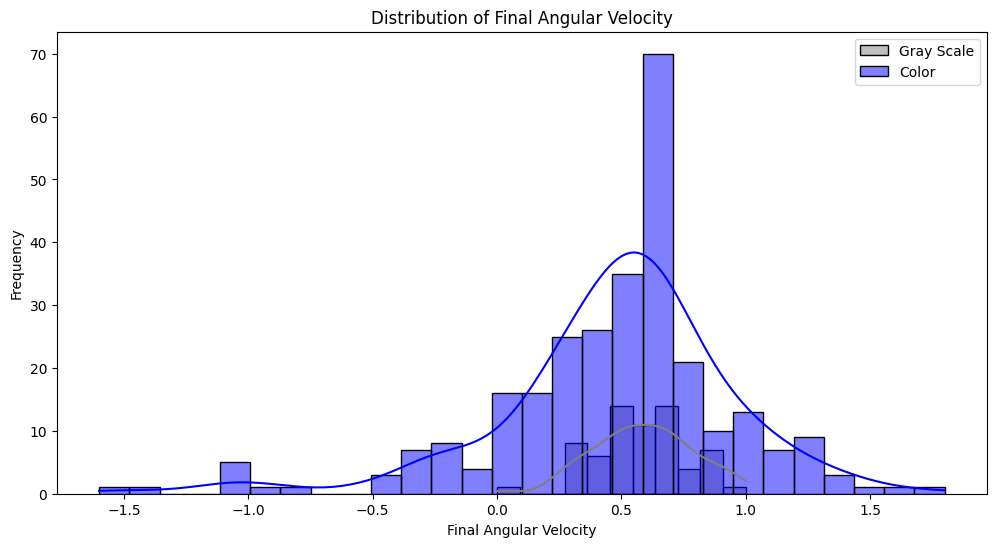

In [11]:
# Compare the distribution of angular velocity for grayscale and color experiments
plt.figure(figsize=(12, 6))
sns.histplot(gray_data['Final Angular Velocity'], color='gray', label='Gray Scale', kde=True)
sns.histplot(color_data['Final Angular Velocity'], color='blue', label='Color', kde=True)
plt.legend()
plt.title('Distribution of Final Angular Velocity')
plt.xlabel('Final Angular Velocity')
plt.ylabel('Frequency')
plt.show()

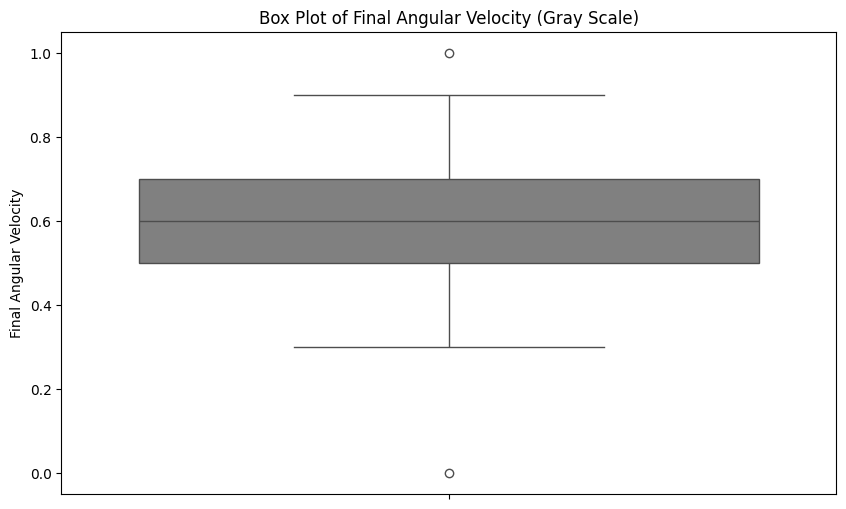

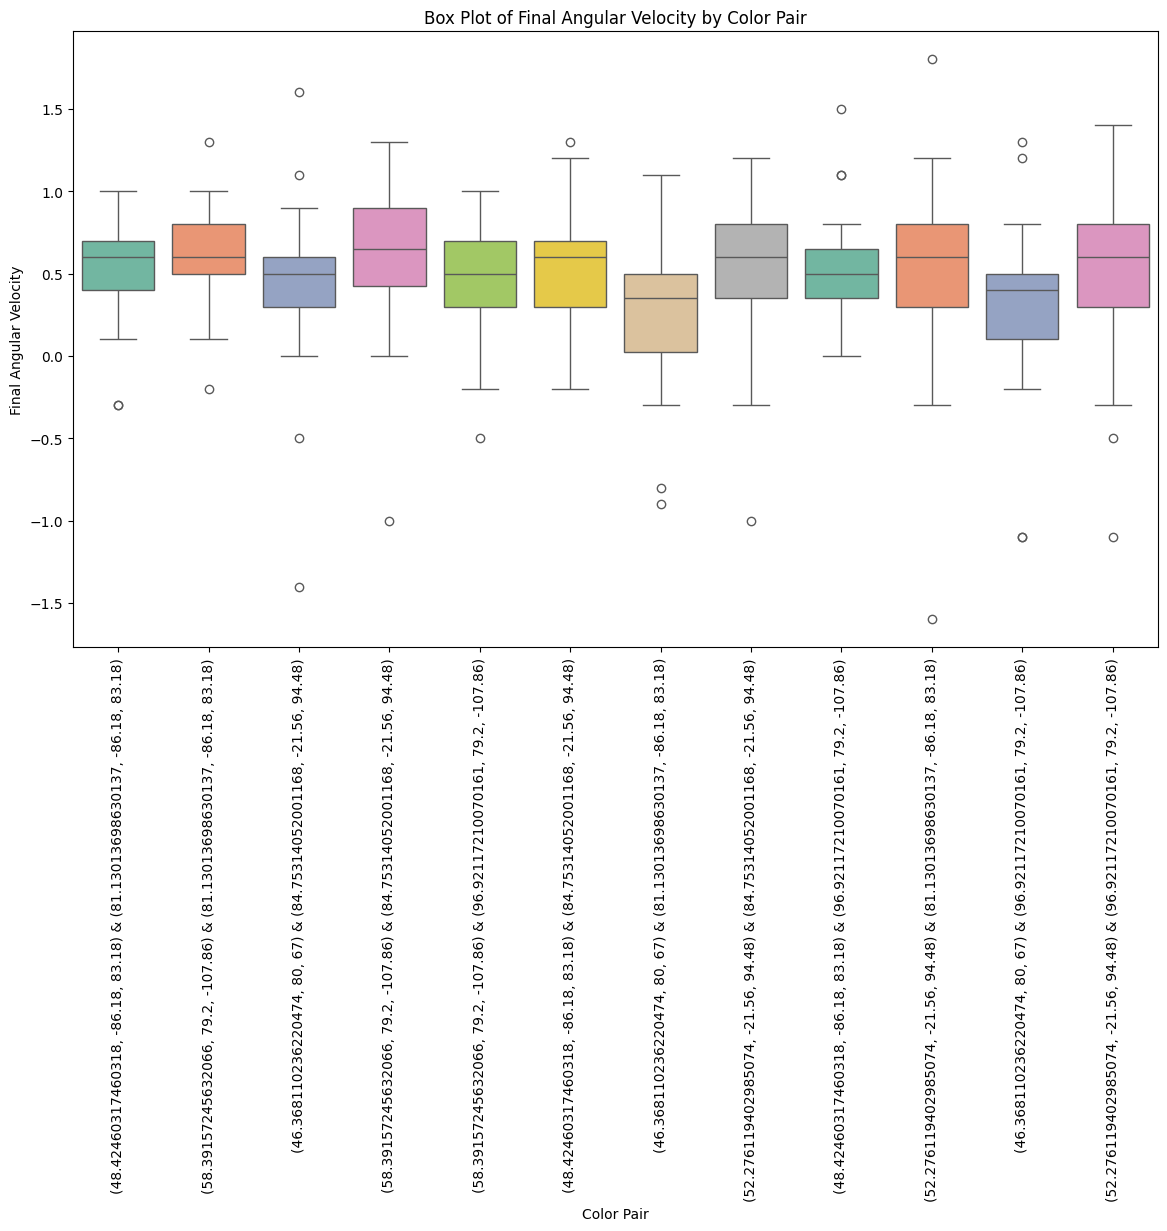

In [12]:


# If necessary, fill or drop missing values
gray_data = gray_data.dropna()
color_data = color_data.dropna()

# Create a new column to identify color pairs
color_data['Color Pair'] = color_data.apply(lambda row: f"{row['Lab (g1)']} & {row['Lab (g2)']}", axis=1)


# Box Plot for Gray Version
plt.figure(figsize=(10, 6))
sns.boxplot(data=gray_data, y='Final Angular Velocity', color='gray')
plt.title('Box Plot of Final Angular Velocity (Gray Scale)')
plt.ylabel('Final Angular Velocity')
plt.show()

# Box Plot for Color Version Grouped by the Same Type of Color Pair
plt.figure(figsize=(14, 8))
sns.boxplot(data=color_data, x='Color Pair', y='Final Angular Velocity', hue='Color Pair', palette='Set2', legend=False)
plt.title('Box Plot of Final Angular Velocity by Color Pair')
plt.xlabel('Color Pair')
plt.ylabel('Final Angular Velocity')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


In [13]:
# Combine 'Lab (g1)' and 'Lab (g2)' into a single column for grouping
color_data['Color Pair'] = color_data['Lab (g1)'].astype(str) + ' & ' + color_data['Lab (g2)'].astype(str)

# Display the first few rows to verify the new column
color_data.head()


,L value (g1),Actual Luminance (g1),RGB (g1),Lab (g1),L value (g2),Actual Luminance (g2),RGB (g2),Lab (g2),Final Angular Velocity,Color Pair
0,48.424603,48.0,"(0, 141, 0)","(48.42460317460318, -86.18, 83.18)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",0.6,"(48.42460317460318, -86.18, 83.18) & (81.13013..."
1,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",81.130137,199.0,"(0, 235, 0)","(81.13013698630137, -86.18, 83.18)",0.5,"(58.39157245632066, 79.2, -107.86) & (81.13013..."
2,46.368110,48.0,"(231, 0, 0)","(46.368110236220474, 80, 67)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",0.4,"(46.368110236220474, 80, 67) & (84.75314052001..."
3,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",84.753141,199.0,"(216, 219, 0)","(84.75314052001168, -21.56, 94.48)",1.1,"(58.39157245632066, 79.2, -107.86) & (84.75314..."
4,58.391573,48.0,"(143, 88, 255)","(58.39157245632066, 79.2, -107.86)",96.921172,199.0,"(255, 195, 255)","(96.92117210070161, 79.2, -107.86)",0.7,"(58.39157245632066, 79.2, -107.86) & (96.92117..."


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Combine 'Lab (g1)' and 'Lab (g2)' into a single column for grouping
def sort_lab_pairs(row):
    g1 = row['Lab (g1)']
    g2 = row['Lab (g2)']
    return ' & '.join(sorted([str(g1), str(g2)]))

color_data['Color Pair'] = color_data.apply(sort_lab_pairs, axis=1)

# Create a dictionary to map each unique Color Pair to a group label
unique_color_pairs = color_data['Color Pair'].unique()
group_labels = {pair: f'Group {i+1}' for i, pair in enumerate(unique_color_pairs)}

# Add the Group column to the DataFrame
color_data['Group'] = color_data['Color Pair'].map(group_labels)



# Group by 'Group' and aggregate the 'Final Angular Velocity'
grouped_data = color_data.groupby('Group')['Final Angular Velocity'].agg(['mean', 'std', 'count']).reset_index()
grouped_data.columns = ['Group', 'Mean Final Angular Velocity', 'Std Dev Final Angular Velocity', 'Count']

# Display the aggregated data
print(grouped_data)



       Group  Mean Final Angular Velocity  Std Dev Final Angular Velocity  \
0    Group 1                     0.500000                        0.288314   
1   Group 10                     0.469565                        0.649080   
2   Group 11                     0.276190                        0.590682   
3   Group 12                     0.452941                        0.692926   
4    Group 2                     0.614286                        0.349694   
5    Group 3                     0.415385                        0.532686   
6    Group 4                     0.623077                        0.456340   
7    Group 5                     0.475000                        0.335248   
8    Group 6                     0.500000                        0.400960   
9    Group 7                     0.236364                        0.476640   
10   Group 8                     0.530769                        0.475621   
11   Group 9                     0.573684                        0.358767   

### T-test gray scale vs. Overall Color scale

In [15]:
from scipy.stats import ttest_ind

# Extract the final angular velocity data for both conditions
color_angular_velocities = color_data['Final Angular Velocity']
gray_angular_velocities = gray_data['Final Angular Velocity']

# Perform the independent t-test
t_stat, p_value = ttest_ind(color_angular_velocities, gray_angular_velocities)

# Display the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -1.8554364848111533
P-value: 0.06437687213015568


In [16]:
# Interpretation based on the p-value
alpha = 0.05  # Common significance level

if p_value < alpha:
    print("The difference in angular velocities between color and gray scale conditions is statistically significant.")
else:
    print("The difference in angular velocities between color and gray scale conditions is not statistically significant.")


The difference in angular velocities between color and gray scale conditions is not statistically significant.


### T test for gray scale vs. each individual color pair 

       Group  T-statistic   P-value     Significance
0    Group 1    -1.749933  0.083292  Not Significant
1   Group 10    -1.309418  0.193840  Not Significant
2   Group 11    -3.700092  0.000382      Significant
3   Group 12    -1.381025  0.171070  Not Significant
4    Group 2     0.460272  0.646496  Not Significant
5    Group 3    -2.257253  0.026412      Significant
6    Group 4     0.540543  0.590158  Not Significant
7    Group 5    -1.936379  0.056030  Not Significant
8    Group 6    -1.391403  0.167496  Not Significant
9    Group 7    -4.876869  0.000005      Significant
10   Group 8    -0.795779  0.428254  Not Significant
11   Group 9    -0.201374  0.840899  Not Significant


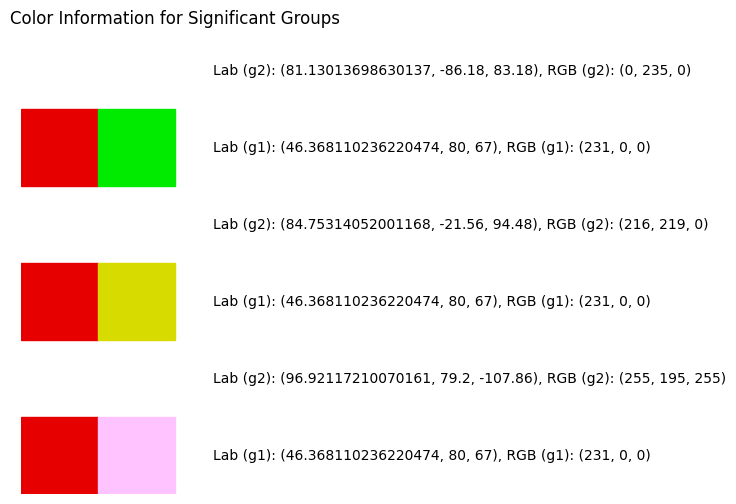

In [27]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


# Extract the final angular velocity data for the gray scale condition
gray_angular_velocities = gray_data['Final Angular Velocity']

# Group the color data by the 'Group' column
grouped_color_data = color_data.groupby('Group')

# Initialize lists to store the results
groups = []
t_stats = []
p_values = []
significance = []

# Perform the t-test for each group
for group_name, group_data in grouped_color_data:
    color_angular_velocities = group_data['Final Angular Velocity']
    t_stat, p_value = ttest_ind(color_angular_velocities, gray_angular_velocities)
    
    groups.append(group_name)
    t_stats.append(t_stat)
    p_values.append(p_value)
    significance.append('Significant' if p_value < 0.05 else 'Not Significant')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Group': groups,
    'T-statistic': t_stats,
    'P-value': p_values,
    'Significance': significance
})

# Display the results
print(results_df)

# Filter for significant groups
significant_groups = results_df[results_df['Significance'] == 'Significant']

# Visualize the color information for significant groups as squares
fig, ax = plt.subplots(figsize=(10, 2 * len(significant_groups)))
for i, group_name in enumerate(significant_groups['Group']):
    group_color_data = color_data[color_data['Group'] == group_name][['Lab (g1)', 'RGB (g1)', 'Lab (g2)', 'RGB (g2)']].drop_duplicates().reset_index(drop=True)
    for j, row in group_color_data.iterrows():
        g1_color = eval(row['RGB (g1)'])
        g2_color = eval(row['RGB (g2)'])
        
        # Plot the squares
        ax.add_patch(plt.Rectangle((0, i * 2), 1, 1, color=[c / 255 for c in g1_color]))
        ax.add_patch(plt.Rectangle((1, i * 2), 1, 1, color=[c / 255 for c in g2_color]))
        
        # Annotate with the color information
        ax.text(2.5, i * 2 + 0.5, f"Lab (g1): {row['Lab (g1)']}, RGB (g1): {row['RGB (g1)']}", va='center')
        ax.text(2.5, i * 2 + 1.5, f"Lab (g2): {row['Lab (g2)']}, RGB (g2): {row['RGB (g2)']}", va='center')

# Adjust plot settings
ax.set_xlim(0, 4)
ax.set_ylim(0, 2 * len(significant_groups))
ax.set_aspect('equal')
ax.axis('off')
plt.title('Color Information for Significant Groups')
plt.show()


In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_pattern(ax, xc, yc, r_max, clockwise, decay_factor, g1, g2, color1, color2):
    # Define the color order for clockwise and anti-clockwise rotations
    if clockwise:
        vals_t = [color1, g1, color2, g2]
    else:
        vals_t = [g2, color2, g1, color1]

    num_ts = 96
    num_rs = 8

    # Calculate the proportional widths of each ring
    ring_widths = []
    total_width = 0
    r = r_max
    for r_idx in range(num_rs):
        dr = r * (1 - decay_factor)
        ring_widths.append(dr)
        total_width += dr
        r *= decay_factor

    # Adjust the widths so they sum up to r_max
    ring_widths = [rw * (r_max / total_width) for rw in ring_widths]

    r = r_max
    for r_idx in range(num_rs):
        t_val_pos = r_idx % 4
        dr = ring_widths[r_idx]

        for t_idx in range(num_ts):
            theta1 = t_idx * 2 * np.pi / num_ts
            theta2 = (t_idx + 1) * 2 * np.pi / num_ts

            wedge = patches.Wedge(
                (xc, yc), r, np.degrees(theta1), np.degrees(theta2),
                facecolor=[v / 255 for v in vals_t[t_val_pos]], width=dr
            )

            ax.add_patch(wedge)
            t_val_pos = (t_val_pos + 1) % 4

        r -= dr

def visualize_significant_pairs(significant_groups, color_data):
    fig, ax = plt.subplots(figsize=(10, 2 * len(significant_groups)))
    bkg_val = 128
    ax.set_aspect('equal')
    ax.set_facecolor([bkg_val / 255] * 3)
    is_clockwise = True
    decay_factor = 0.8
    r_max = 1  # Adjust radius for better visualization

    for i, group_name in enumerate(significant_groups['Group']):
        group_color_data = color_data[color_data['Group'] == group_name][['Lab (g1)', 'RGB (g1)', 'Lab (g2)', 'RGB (g2)']].drop_duplicates().reset_index(drop=True)
        
        for j, row in group_color_data.iterrows():
            g1_color = eval(row['RGB (g1)'])
            g2_color = eval(row['RGB (g2)'])
            color1 = (0, 0, 0)  # Black
            color2 = (255, 255, 255)  # White
            
            # Draw the circle pattern
            draw_pattern(ax, 5, i * 2 + 1, r_max, is_clockwise, decay_factor, g1_color, g2_color, color1, color2)
    
    plt.xlim(0, 10)
    plt.ylim(0, 2 * len(significant_groups))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('Color Information and Patterns for Significant Groups')
    plt.show()

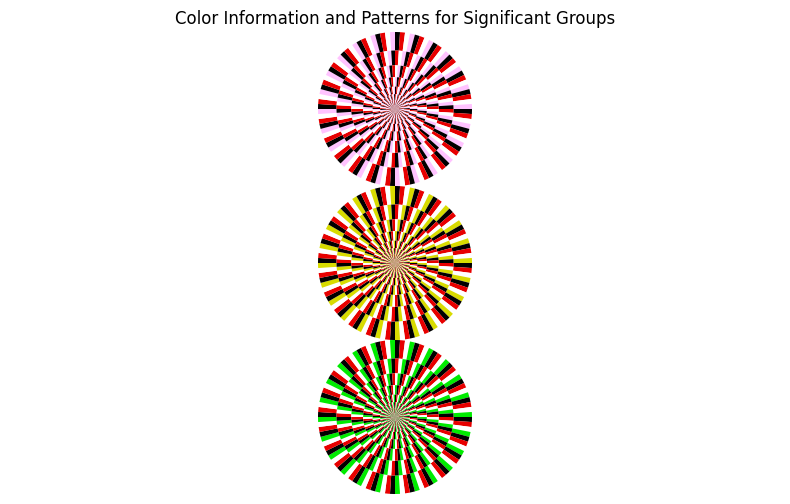

In [19]:
# Assuming `results_df` and `color_data` DataFrames are already defined and contain the necessary data.
# Filter for significant groups
significant_groups = results_df[results_df['Significance'] == 'Significant']

# Call the function to visualize the significant pairs
visualize_significant_pairs(significant_groups, color_data)